In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load) 
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

#examine clinical trial data 
clinical_trial_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
#examine mouse drug data
mouse_drug_data

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [8]:

# Combine the data into a single dataset

combined_df = pd.merge(mouse_drug_data, clinical_trial_data, on='Mouse ID', how='inner')
# Display the data table for preview
combined_df


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [64]:
grouped_gbo = combined_df.groupby('Drug')
ketapril_df = grouped_gbo.get_group('Ketapril')
capomulin_df = grouped_gbo.get_group('Capomulin')
placebo_df = grouped_gbo.get_group('Placebo')
infubinol_df = grouped_gbo.get_group('Infubinol')

ketapril_df


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0
...,...,...,...,...,...
576,u327,Ketapril,30,57.314072,0
577,u327,Ketapril,35,58.089028,1
578,u327,Ketapril,40,60.466545,1
579,u327,Ketapril,45,66.268801,2


In [65]:
ketapril_gbo = ketapril_df.groupby('Timepoint')["Tumor Volume (mm3)"].mean()
capomulin_gbo = capomulin_df.groupby('Timepoint')["Tumor Volume (mm3)"].mean()
placebo_gbo = placebo_df.groupby('Timepoint')["Tumor Volume (mm3)"].mean()
infubinol_gbo = infubinol_df.groupby('Timepoint')["Tumor Volume (mm3)"].mean()



ketapril_gbo

Timepoint
0     45.000000
5     47.389175
10    49.582269
15    52.399974
20    54.920935
25    57.678982
30    60.994507
35    63.371686
40    66.068580
45    70.662958
Name: Tumor Volume (mm3), dtype: float64

Text(0.5, 0, 'Time (Days)')

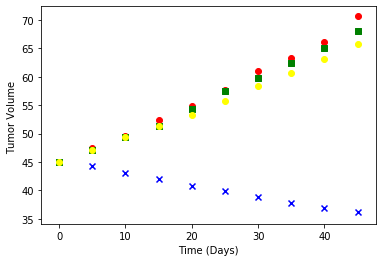

In [69]:
x = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
y = ketapril_gbo

plt.scatter(x, y, marker="o", color="red")
plt.scatter(x, capomulin_gbo, marker="x", color="blue")
plt.scatter(x, placebo_gbo, marker="s", color="green")
plt.scatter(x, infubinol_gbo, marker="o", color="yellow")
plt.ylabel('Tumor Volume ')
plt.xlabel('Time (Days)')


## Tumor Response to Treatment

## Metastatic Response to Treatment

In [71]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
ketapril_metagbo = ketapril_df.groupby('Timepoint')["Metastatic Sites"].mean()
capomulin_metagbo = capomulin_df.groupby('Timepoint')["Metastatic Sites"].mean()
placebo_metagbo = placebo_df.groupby('Timepoint')["Metastatic Sites"].mean()
infubinol_metagbo = infubinol_df.groupby('Timepoint')["Metastatic Sites"].mean()

capomulin_metagbo

Timepoint
0     0.000000
5     0.160000
10    0.320000
15    0.375000
20    0.652174
25    0.818182
30    1.090909
35    1.181818
40    1.380952
45    1.476190
Name: Metastatic Sites, dtype: float64

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Text(0.5, 0, 'Time (Days)')

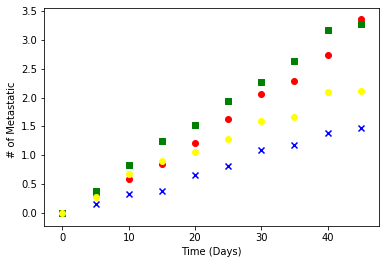

In [73]:
x = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
y = ketapril_metagbo

plt.scatter(x, y, marker="o", color="red")
plt.scatter(x, capomulin_metagbo, marker="x", color="blue")
plt.scatter(x, placebo_metagbo, marker="s", color="green")
plt.scatter(x, infubinol_metagbo, marker="o", color="yellow")
plt.ylabel('# of Metastatic Sites  ')
plt.xlabel('Time (Days)')


## Summary Bar Graph

In [91]:
# Calculate the percent changes for each drug

# Display the data to confirm
k_volume = ketapril_gbo.reset_index()

k_volume = k_volume['Tumor Volume (mm3)']

k_pct_change = (((k_volume.iloc[9] - k_volume.iloc[0]) / k_volume.iloc[0]) * 100)

c_volume = capomulin_gbo.reset_index() 
p_volume = placebo_gbo.reset_index() 
i_volume = infubinol_gbo.reset_index()

c_volume  = c_volume['Tumor Volume (mm3)']
p_volume  = p_volume['Tumor Volume (mm3)']
i_volume  = i_volume['Tumor Volume (mm3)']

c_pct_change = (((c_volume.iloc[9] - c_volume.iloc[0]) / c_volume.iloc[0]) * 100)

i_pct_change = (((i_volume.iloc[9] - i_volume.iloc[0]) / i_volume.iloc[0]) * 100)

p_pct_change = (((p_volume.iloc[9] - p_volume.iloc[0]) / p_volume.iloc[0]) * 100)

c_pct_change

i_pct_change

p_pct_change




51.29796048315153

<BarContainer object of 4 artists>

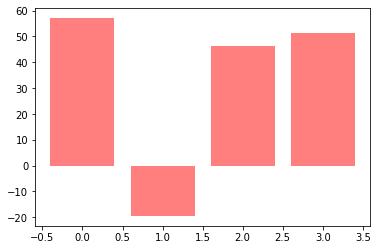

In [94]:
y_axis = [k_pct_change, c_pct_change, i_pct_change, p_pct_change]
x_axis = np.arange(len(y_axis))

# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)